In [7]:
import sys 
import os
sys.path.append(os.path.abspath("/home/stomps/repos/helpmetric"))
import cymetrichelper as cyh
import pandahelper as pdh


import cymetric as cym
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
from cymetric import graphs as cgr
from cymetric import timeseries as tm
from cymetric import filters as fl

%matplotlib inline

0
1
2
3


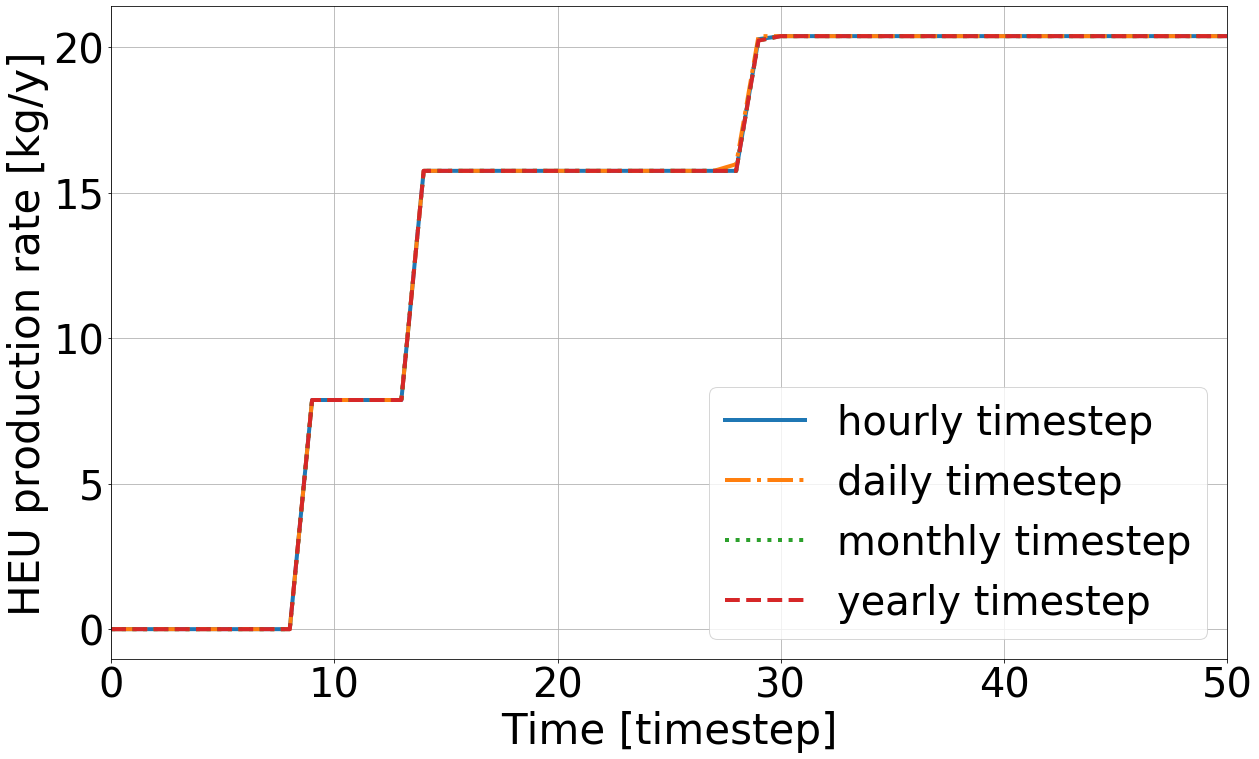

In [2]:
files = ['case_2/NR_25_3_1_1_hour.sqlite',
         'case_2/NR_25_3_1_1_day.sqlite',
         'case_2/NR_25_3_1_1.sqlite',
         'case_2/NR_25_3_1_1_year.sqlite']
invs = ['storage_3',
        'storage_3',
        'storage_3',
        'storage_3']

c_names = ['hourly timestep','daily timestep','monthly timestep','yearly timestep']

time_factor = [24*30.438032*12,30.438032*12, 12, 1]
LEU_qty_case_2_x = []
plt_LEU_qty_case_2_x = []
style = ['-', '-.', ':', '--']
color = ['C0', 'C1', 'C2', 'C3']
for i in range(4):
    print(i)
    db_ = cym.dbopen(files[i])
    ev_ = cym.Evaluator(db=db_, write=False)

    df_ = tm.transactions(ev_, receivers=[invs[i]])
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    #print(df_.tail())
    
    #df_['Time'] *= 1/time_factor[i]
    df_[c_names[i]] *= time_factor[i]
    LEU_qty_case_2_x.append(df_)
    plt_LEU_qty_case_2_x.append( (LEU_qty_case_2_x[i], c_names[i]) )
    
pdh.MakePlot(plt_LEU_qty_case_2_x, "Time", "HEU production rate [kg/y]", linestyle=style, color=color, mk="", lw=4 )
plt.xlabel('Time [timestep]')
#plt.ylim(0,80)

plt.xlim(0,50)
plt.grid()
x = np.arange(0, 16, 1);
plt.savefig("HEU_prod_timestep.png")

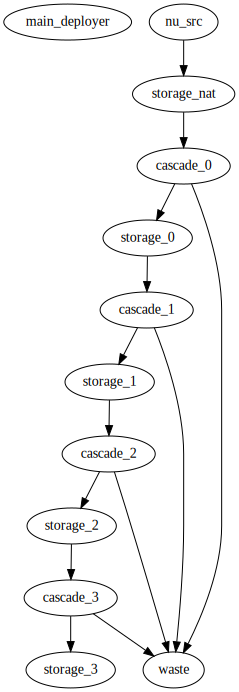

In [79]:
f_h5 = "case_2/NR_25_3_1_1_day.sqlite"
db_h5 = cym.dbopen(f_h5)
ev_h5 = cym.Evaluator(db=db_h5, write=True)
cym.graphs.flow_graph(ev_h5)

In [82]:
ev_h5.known_tables

{'AgentEntry',
 'AgentPosition',
 'AgentStateAgent',
 'AgentStateInventories',
 'AgentState_cycamore_DeployInstInfo',
 'AgentState_cycamore_SinkInfo',
 'AgentState_cycamore_SourceInfo',
 'AgentState_cycamore_StorageInfo',
 'AgentState_mbmore_CascadeEnrichInfo',
 'AgentVersions',
 'BuildSchedule',
 'Compositions',
 'DecayMode',
 'Enrichments',
 'Epsilon',
 'ExplicitInventory',
 'Finish',
 'GreedySolverInfo',
 'Info',
 'InfoExplicitInv',
 'InputFiles',
 'MaterialInfo',
 'Materials',
 'NextIds',
 'Prototypes',
 'Recipes',
 'ResCreators',
 'Resources',
 'Snapshots',
 'SolverInfo',
 'TimeSeriesEnrichmentFeed',
 'TimeSeriesdemandc_depleted_u',
 'TimeSeriesdemandc_enrich_u_0',
 'TimeSeriesdemandc_enrich_u_1',
 'TimeSeriesdemandc_enrich_u_2',
 'TimeSeriesdemandc_enrich_u_3',
 'TimeSeriesdemandc_nat_u_',
 'TimeSeriessupplyc_enrich_u_0_str',
 'TimeSeriessupplyc_enrich_u_1_str',
 'TimeSeriessupplyc_enrich_u_2_str',
 'TimeSeriessupplyc_enrich_u_3_str',
 'TimeSeriessupplyc_nat_u',
 'TimeSeriessuppl

In [5]:
ev_h5.eval("AgentEntry")

,SimId,AgentId,Kind,Spec,Prototype,ParentId,Lifetime,EnterTime
0,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,21,Inst,:cycamore:DeployInst,main_deployer,-1,-1,0
1,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,22,Facility,:cycamore:Source,nu_src,21,-1,1
2,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,23,Facility,:mbmore:CascadeEnrich,cascade_0,21,-1,1
3,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,24,Facility,:mbmore:CascadeEnrich,cascade_0,21,-1,1
4,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,25,Facility,:mbmore:CascadeEnrich,cascade_0,21,-1,1
5,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,26,Facility,:mbmore:CascadeEnrich,cascade_0,21,-1,1
6,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,27,Facility,:mbmore:CascadeEnrich,cascade_0,21,-1,1
7,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,28,Facility,:mbmore:CascadeEnrich,cascade_0,21,-1,1
8,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,29,Facility,:mbmore:CascadeEnrich,cascade_0,21,-1,1
9,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,30,Facility,:mbmore:CascadeEnrich,cascade_0,21,-1,1


In [8]:
fl.inventories(evaler=ev_h5)


,SimId,AgentId,Prototype,Time,InventoryName,NucId,Quantity
0,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,23,cascade_0,3,tails,922350000,0.110973
1,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,23,cascade_0,3,tails,922380000,40.533833
2,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,23,cascade_0,4,tails,922350000,0.110973
3,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,23,cascade_0,4,tails,922380000,40.533833
4,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,23,cascade_0,5,tails,922350000,0.110973
...,...,...,...,...,...,...,...
38555,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,58,waste,537,inventory,922380000,608906.733364
38556,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,58,waste,538,inventory,922350000,3470.896105
38557,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,58,waste,538,inventory,922380000,610049.117635
38558,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,58,waste,539,inventory,922350000,3477.454041


In [51]:
d238 = fl.transactions_nuc(evaler=ev_h5, senders=['storage_0'], nucs=['922380000'])
d238

,SimId,ResourceId,NucId,Mass,ReceiverId,ReceiverPrototype,SenderId,SenderPrototype,TransactionId,Commodity,Time
0,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,1109,922380000,129.227203,50,cascade_1,48,storage_0,101,c_enrich_u_0_str,4
1,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,2146,922380000,129.227203,50,cascade_1,48,storage_0,177,c_enrich_u_0_str,5
2,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,3243,922380000,129.227203,50,cascade_1,48,storage_0,254,c_enrich_u_0_str,6
3,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,4342,922380000,129.227203,50,cascade_1,48,storage_0,333,c_enrich_u_0_str,7
4,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,5461,922380000,129.227203,50,cascade_1,48,storage_0,413,c_enrich_u_0_str,8
...,...,...,...,...,...,...,...,...,...,...,...
1578,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,631412,922380000,29.357045,52,cascade_1,48,storage_0,48055,c_enrich_u_0_str,538
1579,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,631413,922380000,49.935079,51,cascade_1,48,storage_0,48054,c_enrich_u_0_str,538
1580,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,632586,922380000,49.935079,50,cascade_1,48,storage_0,48143,c_enrich_u_0_str,539
1581,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,632588,922380000,29.357045,52,cascade_1,48,storage_0,48145,c_enrich_u_0_str,539


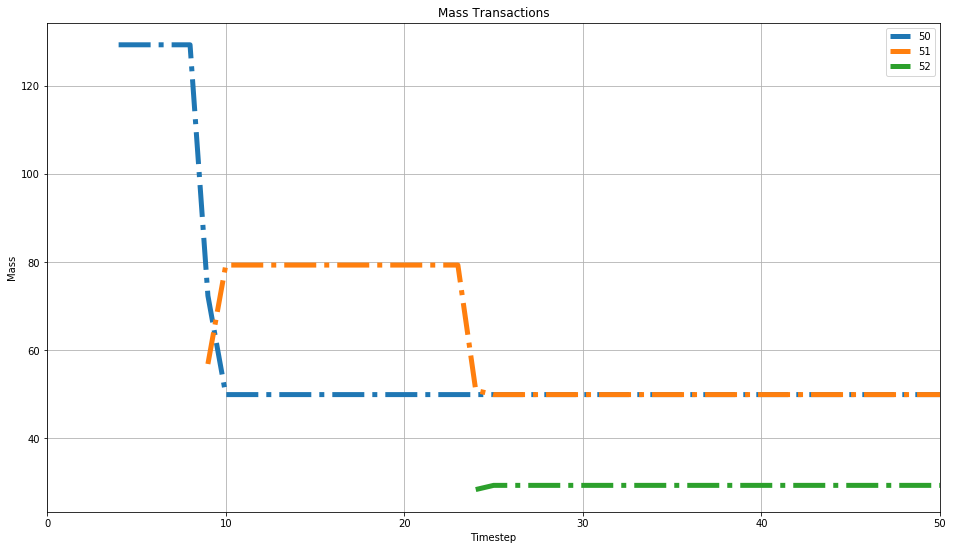

In [77]:
plt.figure(figsize=(16,9))
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

facilities = dict()
for i in d238['ReceiverId'].unique():
    facilities[i] = d238[d238['ReceiverId'] == i]

for id in facilities:
    plt.plot(facilities[id]['Time'],facilities[id]['Mass'],'-.',label = id, linewidth=5.0)
plt.title('Mass Transactions')
plt.xlabel('Timestep')
plt.ylabel('Mass')
plt.xlim(0,50)
plt.grid()
plt.legend()
plt.savefig()

In [40]:
einv = ev_h5.eval("ExplicitInventory")
einv[einv['AgentId'] == 23]

,SimId,AgentId,Time,InventoryName,NucId,Quantity
12,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,23,3,tails,922350000,0.110973
13,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,23,3,tails,922380000,40.533833
68,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,23,4,tails,922350000,0.110973
69,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,23,4,tails,922380000,40.533833
124,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,23,5,tails,922350000,0.110973
...,...,...,...,...,...,...
38355,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,23,537,tails,922380000,40.533833
38426,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,23,538,tails,922350000,0.110973
38427,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,23,538,tails,922380000,40.533833
38498,2e82b2c2-1b2f-4264-a885-45c7c8a1c142,23,539,tails,922350000,0.110973


In [83]:
ev_h5.eval("TimeStepDur")

,SimId,DurationSecs
0,4a4b9933-5cb1-43b5-a653-b2a5d0be56f7,86400
